# Project Name - House Prices: Advanced Regression Techniques
The main aim of this project is to predict the house price based on various features which have been provided in the data set which can be downloaded from the link below
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [110]:
df=pd.read_csv('train.csv')
df.shape

(1460, 81)

In [58]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

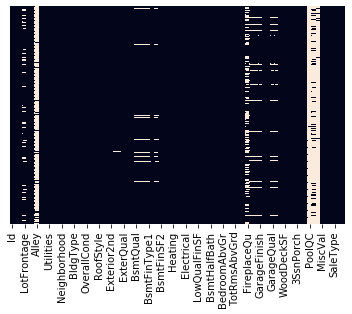

In [59]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [60]:
#Seaching for categorical missing values
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1 and df[feature].dtypes=='O']
for feature in features_nan:
    print("{} - {}% missing values".format(feature,np.round(df[feature].isnull().mean()*100,4)))

Alley - 93.7671% missing values
MasVnrType - 0.5479% missing values
BsmtQual - 2.5342% missing values
BsmtCond - 2.5342% missing values
BsmtExposure - 2.6027% missing values
BsmtFinType1 - 2.5342% missing values
BsmtFinType2 - 2.6027% missing values
Electrical - 0.0685% missing values
FireplaceQu - 47.2603% missing values
GarageType - 5.5479% missing values
GarageFinish - 5.5479% missing values
GarageQual - 5.5479% missing values
GarageCond - 5.5479% missing values
PoolQC - 99.5205% missing values
Fence - 80.7534% missing values
MiscFeature - 96.3014% missing values


In [61]:
## droping all the features having more than 75% of missing data
for feature in features_nan:
    if (np.round(df[feature].isnull().mean(),4)*100)>75.0:
        df.drop([feature], axis=1, inplace=True)
        features_nan.remove(feature)


In [62]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [63]:
## Replace missing values with a 'Missing' label
def replace_catg_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_catg_feature(df,features_nan)

In [64]:
df[features_nan].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
dtype: int64

In [65]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,Missing,0,12,2008,WD,Normal,250000


In [66]:
## checking for numerical variables that contains missing values
num_var_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1 and df[feature].isnull().sum()!='O']

In [67]:
for feature in num_var_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean()*100,4)))

LotFrontage: 17.7397% missing value
MasVnrArea: 0.5479% missing value
GarageYrBlt: 5.5479% missing value


In [68]:
## Replacing the numerical Missing Values

for feature in num_var_with_nan:
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[num_var_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [69]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,MnPrv,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,...,Missing,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,Missing,0,1,2008,WD,Normal,118000,0,0,0


In [70]:
# Exploring Temporal Data
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

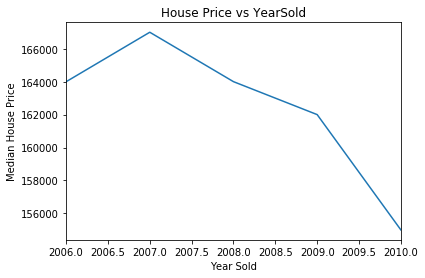

In [71]:
## Checking the relationship between year the house is sold and the sales price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

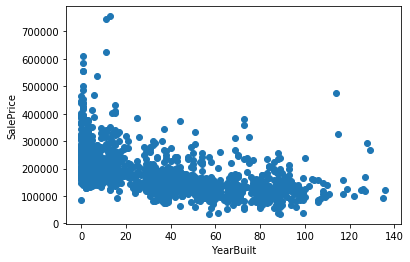

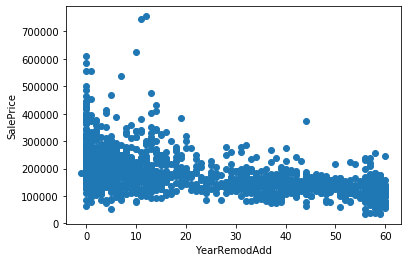

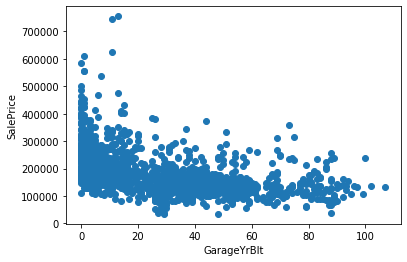

In [72]:
## The above graph dosen't show the right information about the data

## Comparing the difference between All years feature with SalePrice to get better info about the data
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']:
    if feature!='YrSold':
        data=df.copy()
        ## capturing the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [73]:
# These graphs suggest that the older the year feature the lesser the price
# Preprocessing temporal Variable
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       df[feature]=df['YrSold']-df[feature]

In [74]:
## Exploring Numerical variables 
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  41


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,65.0,8450,7,5,5,5,196.0,706,...,0,0,0,0,2,2008,208500,0,0,0
1,2,20,80.0,9600,6,8,31,31,0.0,978,...,0,0,0,0,5,2007,181500,0,0,0
2,3,60,68.0,11250,7,5,7,6,162.0,486,...,0,0,0,0,9,2008,223500,0,0,0
3,4,70,60.0,9550,7,5,91,36,0.0,216,...,0,0,0,0,2,2006,140000,0,0,0
4,5,60,84.0,14260,8,5,8,8,350.0,655,...,0,0,0,0,12,2008,250000,0,0,0


In [75]:
## checking both Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','LotFrontagenan',
 'MasVnrAreanan','GarageYrBltnan','Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','LotFrontagenan',
 'MasVnrAreanan','GarageYrBltnan','Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete Variables Count: 17
Continuous feature Count 16


In [76]:
print(discrete_feature)
df[discrete_feature].head()

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [77]:
print(continuous_feature)
df[continuous_feature].head()

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


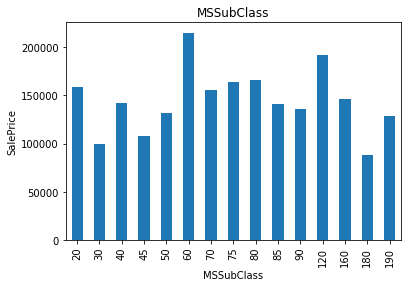

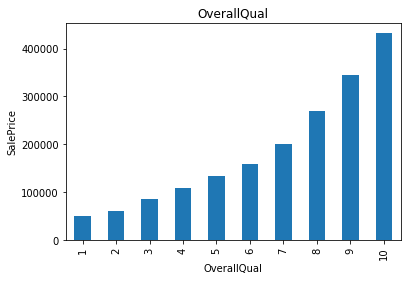

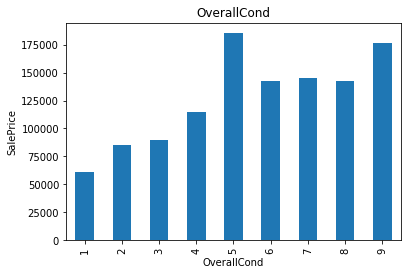

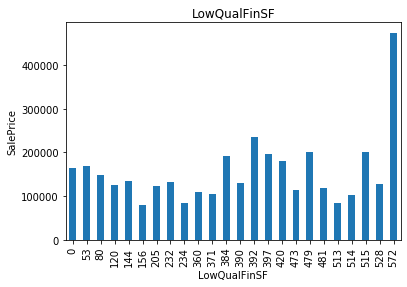

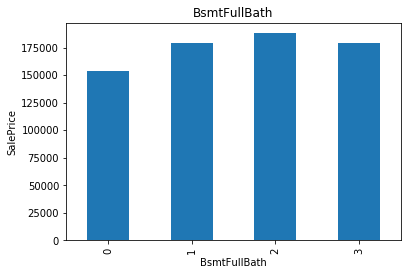

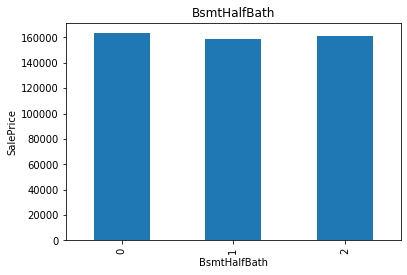

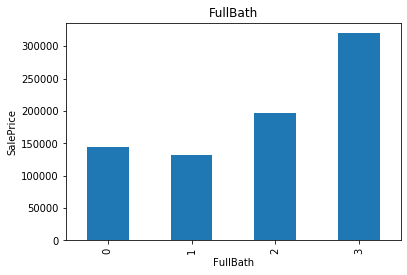

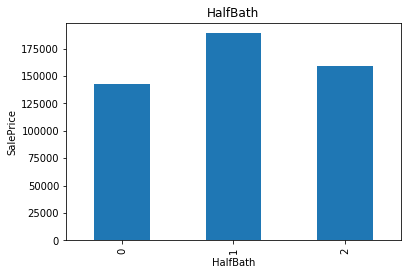

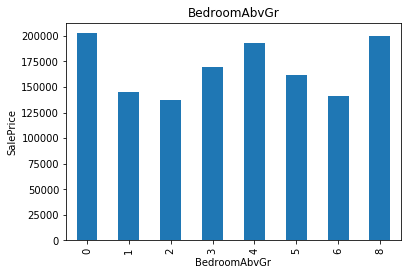

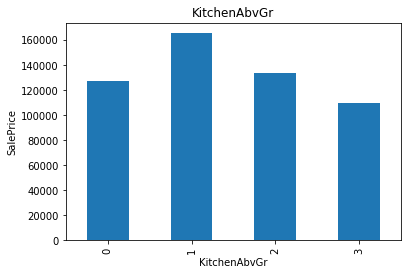

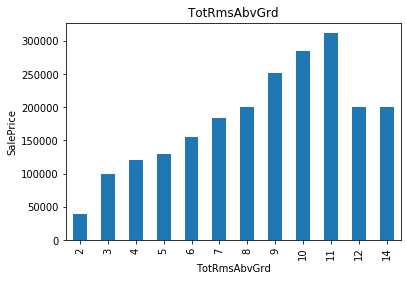

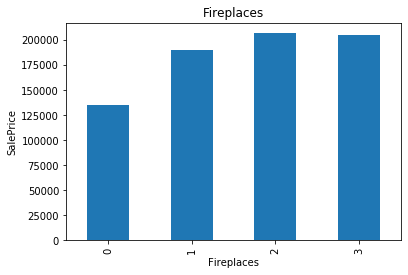

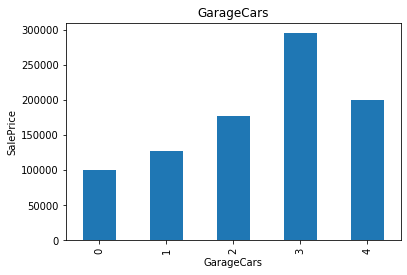

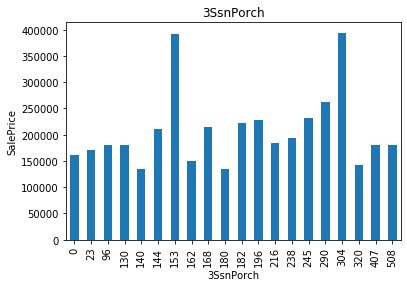

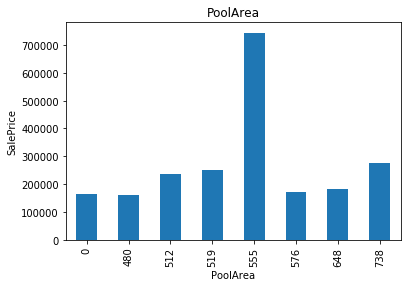

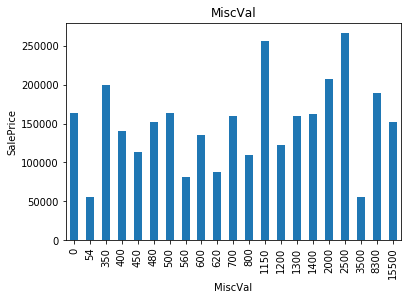

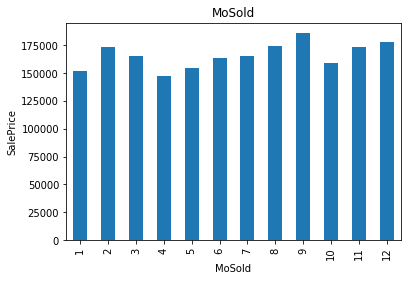

In [78]:
## Relationship between discrete features and Sale price
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [79]:
#majority of them show exponential graph suggesting monotonic realtionship

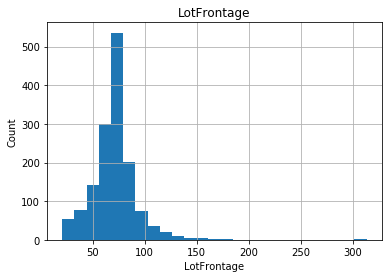

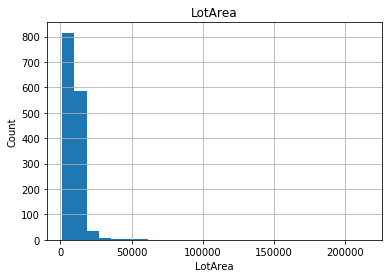

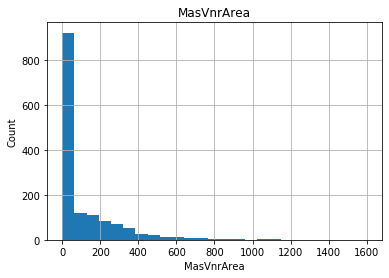

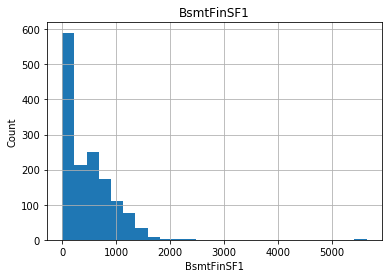

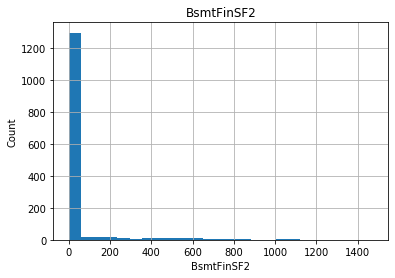

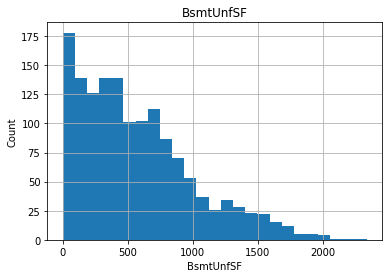

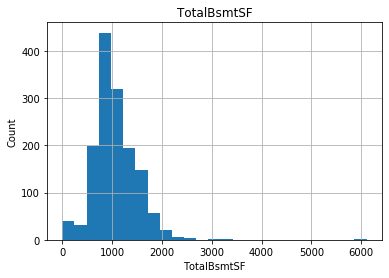

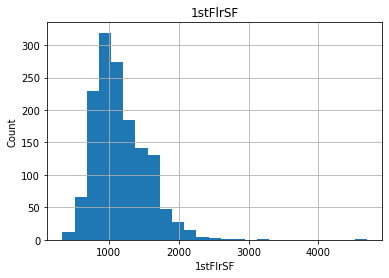

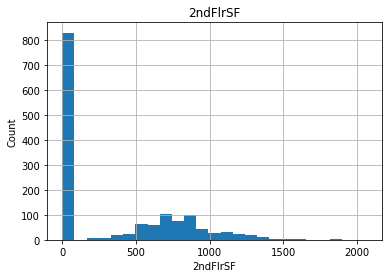

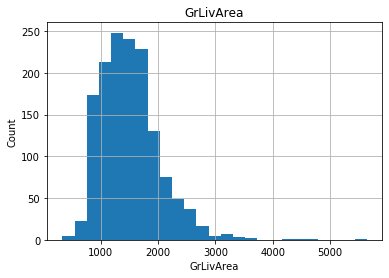

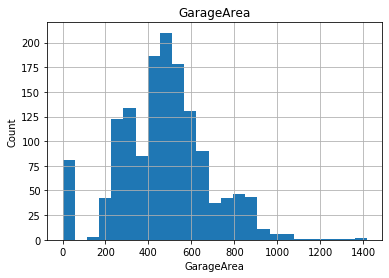

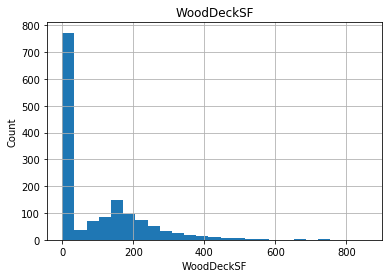

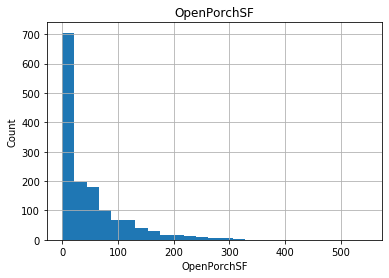

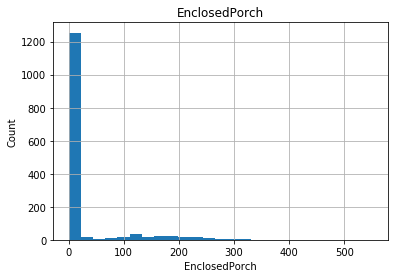

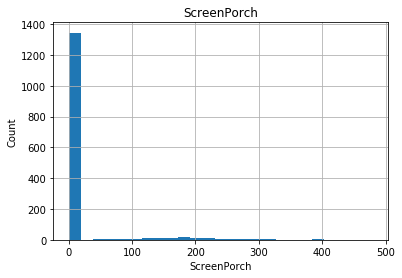

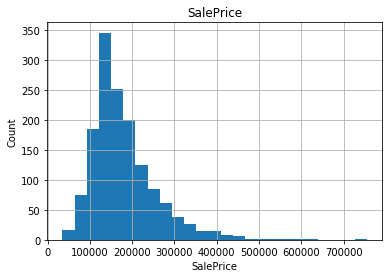

In [80]:
## Relationship between Continous features and Sale price
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

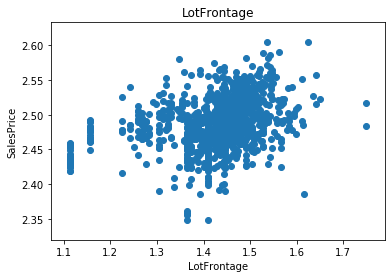

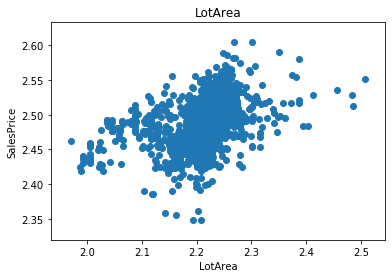

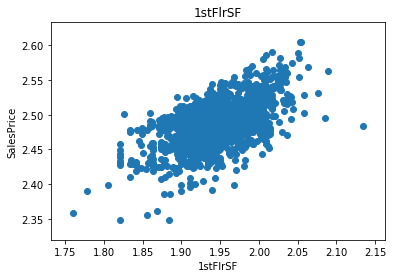

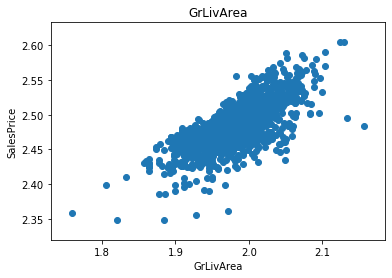

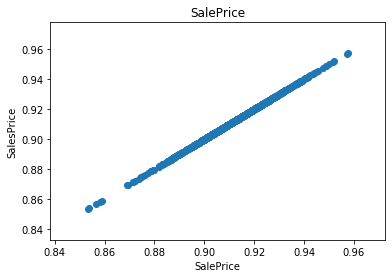

In [81]:
#Except for a very few all of them don't show gaussian distribution impling they have skewed data
# using Logarithimic transformation to get a increase the data quality

import numpy as np
num_features=[feature for feature in continuous_feature if 0 not in data[feature].unique()] #Considering only those which does not have zero value inside
for feature in num_features:
    df[feature]=np.log(df[feature])
    
for feature in num_features:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

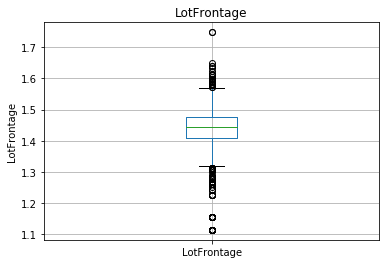

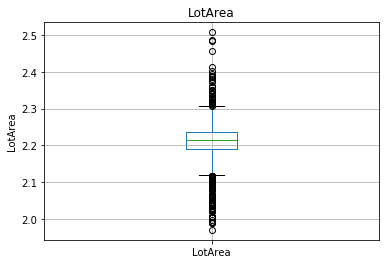

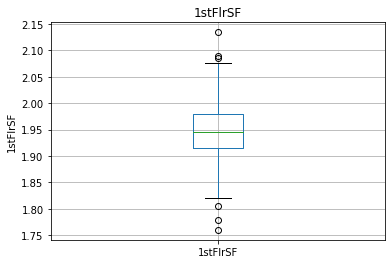

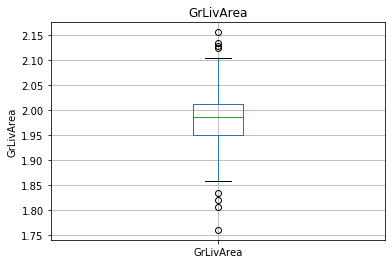

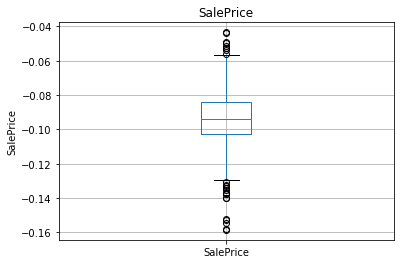

In [82]:
# Visualising outliers
for feature in num_features:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [83]:
# preprocessing categorical data
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

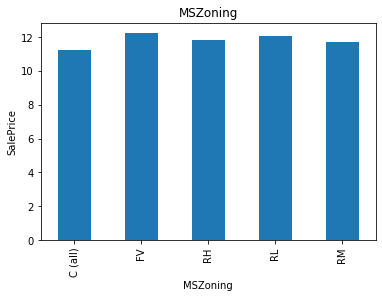

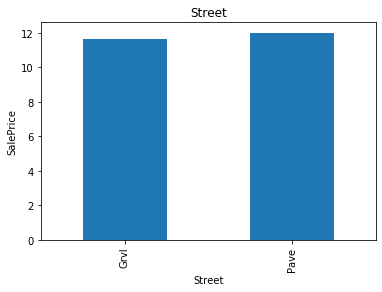

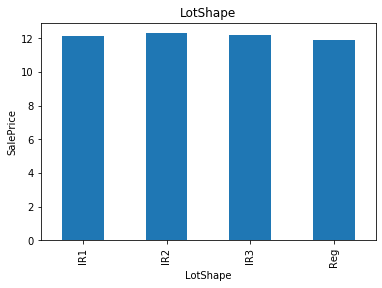

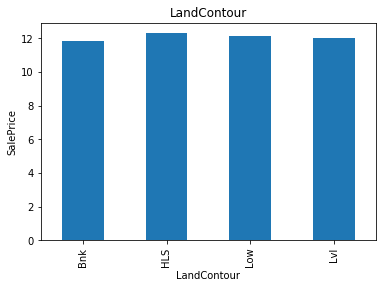

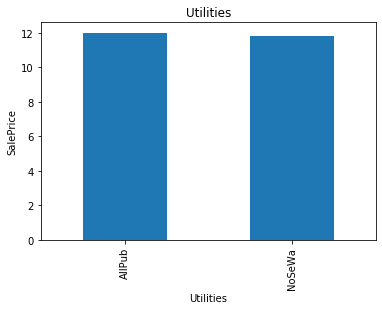

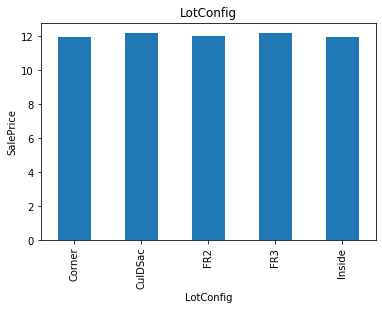

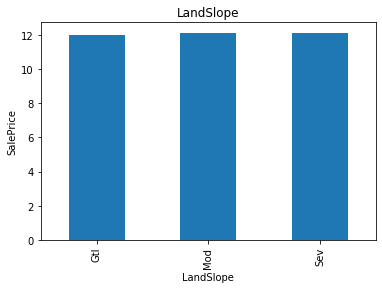

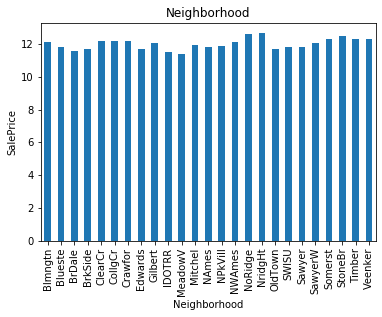

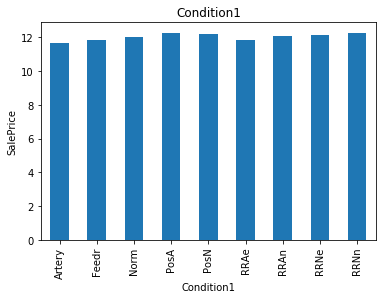

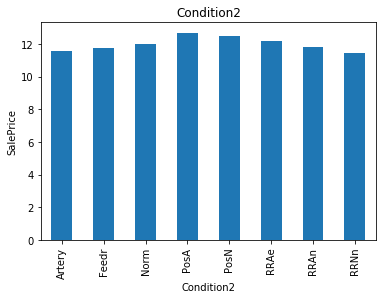

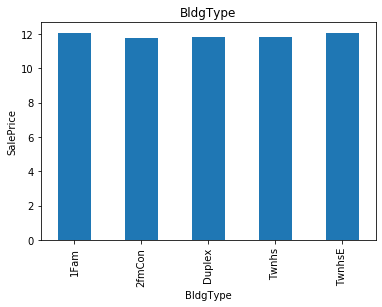

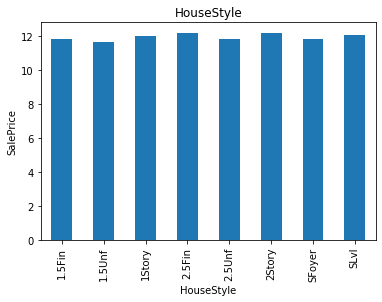

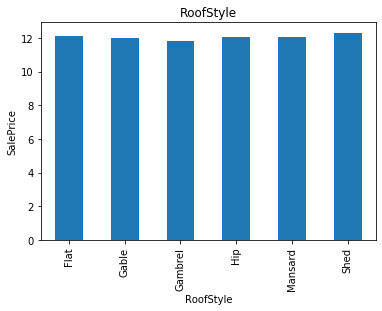

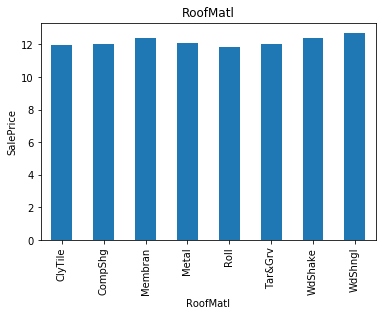

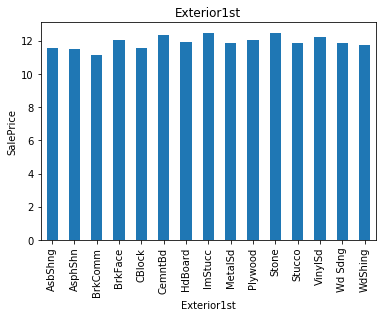

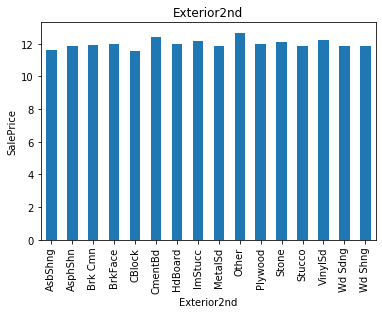

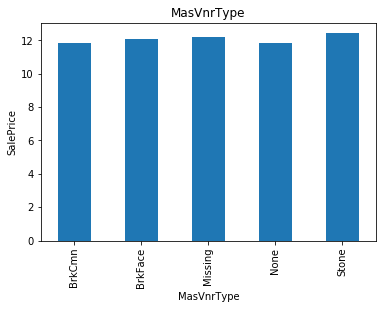

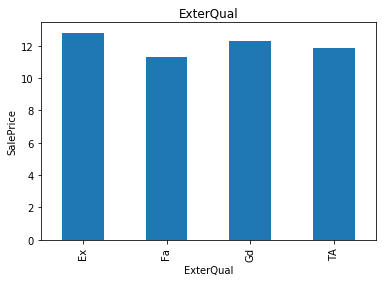

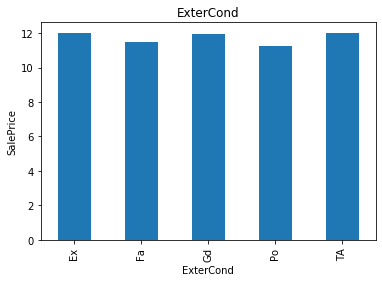

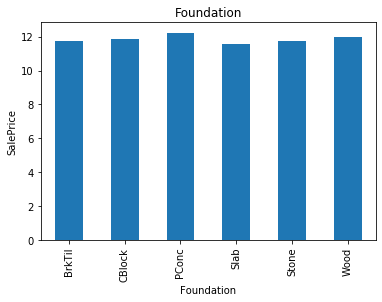

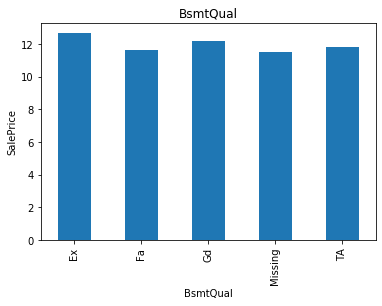

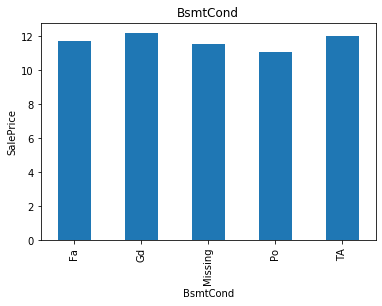

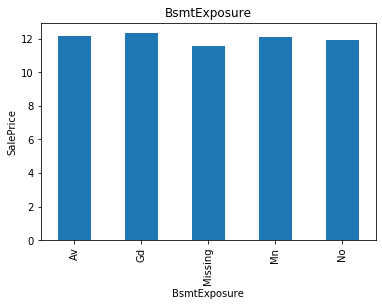

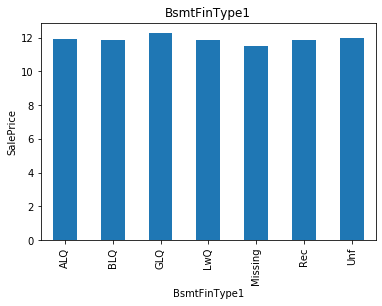

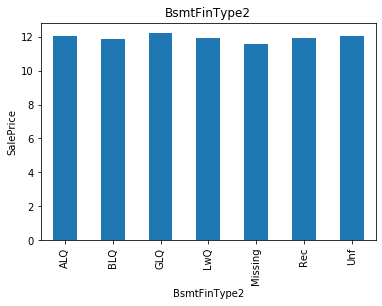

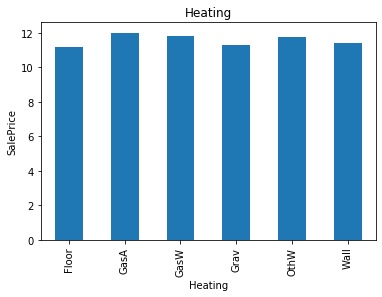

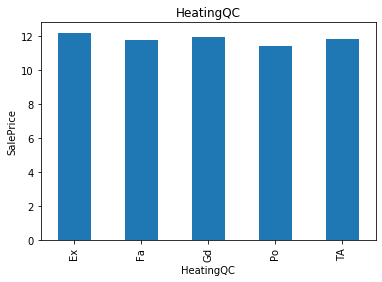

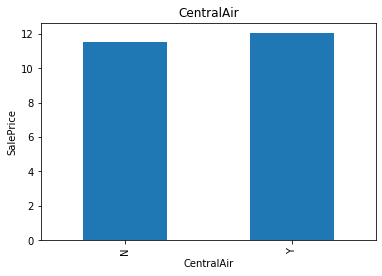

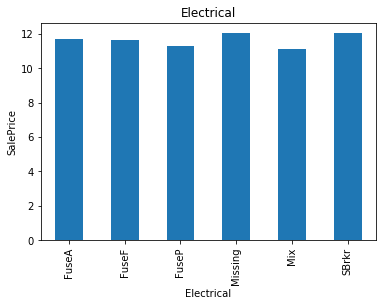

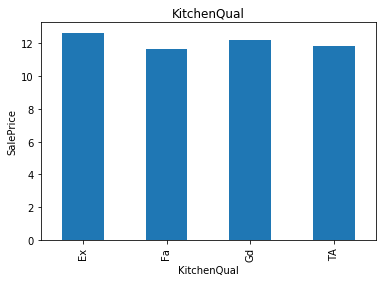

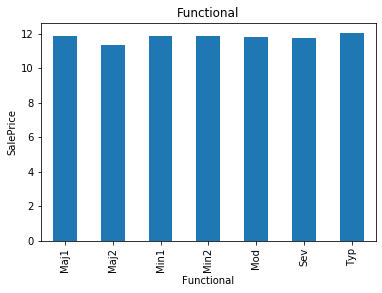

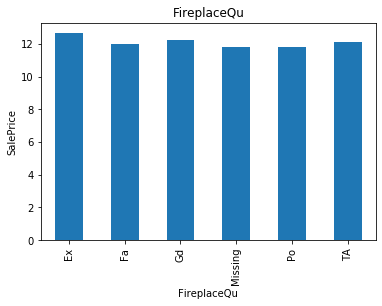

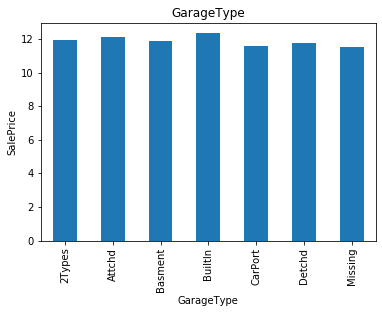

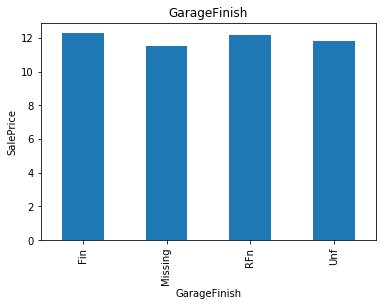

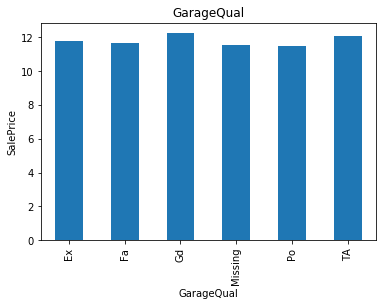

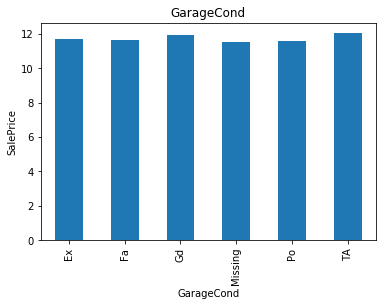

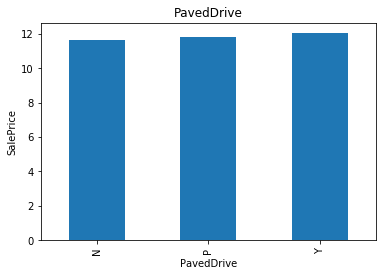

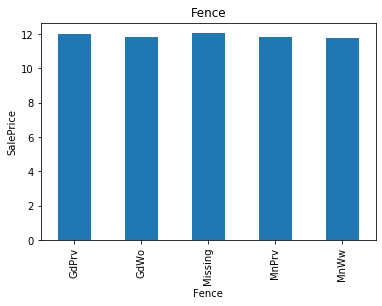

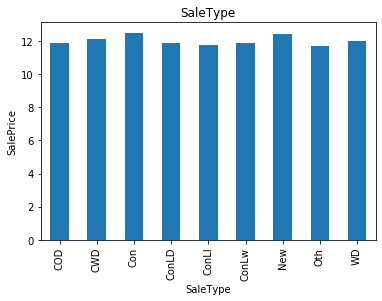

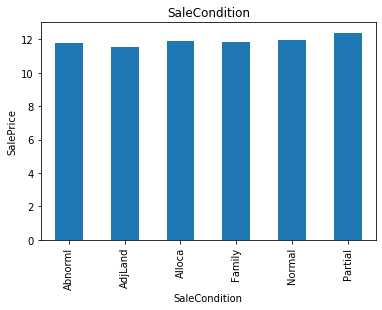

In [84]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [85]:
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index ##categories in cat var which are present in less than 1% of the observations
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var') # replacing those categories with "Rare_var" 

In [86]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,IR1,Lvl,AllPub,Inside,...,MnPrv,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Reg,Lvl,AllPub,Inside,...,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,IR1,Lvl,AllPub,Corner,...,Missing,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Reg,Lvl,AllPub,Inside,...,Missing,0,4,2008,WD,Abnorml,11.774520,0,0,0
9,10,190,RL,3.912023,8.911934,Pave,Reg,Lvl,AllPub,Corner,...,Missing,0,1,2008,WD,Normal,11.678440,0,0,0


In [87]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [88]:
scaling_feature=[feature for feature in df.columns if feature not in ['Id','SalePerice'] ]

In [89]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(df[feature_scale])

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [90]:
scaler.transform(df[feature_scale])

array([[ 0.2       ,  0.        , -0.21707932, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        ,  0.53768943, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.        , -0.05306661, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.4       ,  0.        , -0.16158208, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        , -0.05306661, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       ,  0.        ,  0.30309201, ...,  0.        ,
         0.        ,  0.        ]])

In [91]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,0,1,1,0,...,4,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,0,1,1,2,...,4,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,1,1,1,0,...,4,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,1,1,1,1,...,4,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,1,1,1,2,...,4,0,12,2008,2,3,12.429216,0,0,0


In [92]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['SalePrice','Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [93]:
#splitting the data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(["SalePrice"],axis=1), data['SalePrice'], test_size = 0.2, random_state=0)

In [94]:
data.to_csv('X_train.csv',index=False)

In [95]:
#Linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [96]:
#fitting linear regression on the data
model = lr.fit(X_train, y_train)

In [97]:
#R square value
print('R square is: {}'.format(model.score(X_test, y_test)))

R square is: 0.8195507628032485


In [98]:
#predicting on the test set
predictions = model.predict(X_test)

In [99]:
#evaluating the model on mean square error
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE is {}'.format(mean_squared_error(y_test, predictions)))

RMSE is 0.027319985980013787


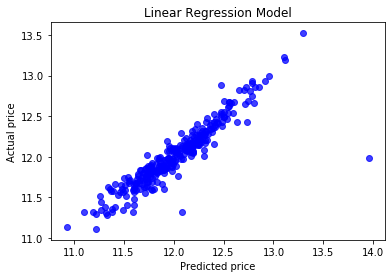

In [100]:

actual_values = y_test
plt.scatter(predictions, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

In [101]:
#Gradient boosting regressor model
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators= 1000, max_depth= 2, learning_rate= .01)
est.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
y_train_predict = est.predict(X_train)
y_test_predict = est.predict(X_test)

In [103]:
est_train = mean_squared_error(y_train, y_train_predict)
print('Mean square error on the Train set is: {}'.format(est_train))

Mean square error on the Train set is: 0.008987193538692463


In [104]:
est_test = mean_squared_error(y_test, y_test_predict)
print('Mean square error on the Test set is: {}'.format(est_test))

Mean square error on the Test set is: 0.017111011774037274


In [105]:
# Random Forrest Regressor model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [106]:
y_pred = regressor.predict(X_test)

In [107]:
print('RMSE is {}'.format(mean_squared_error(y_test, y_pred)))

RMSE is 0.020789528502484136
